In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
class MLPRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim): #构造函数，需要调用nn.Mudule的构造函数
        super().__init__()       #等价于nn.Module.__init__()
        self.linear_hidden = nn.Linear(input_dim, hidden_dim)
        #nn.Parameter(torch.randn(input_dim + 1, hidden_dim))
        self.linear_output = nn.Linear(hidden_dim, 1) 
        self.activation = nn.Sigmoid() #Identity()

    def forward(self, x):
        #x = torch.cat([x, torch.ones((x.shape[0],1))], dim = 1)
        hidden_layer_output = self.activation(self.linear_hidden(x))
        output = self.activation(self.linear_output(hidden_layer_output))
        return output

    def show_info(self):
        for name, parameter in self.named_parameters():
            print(name, '\n',parameter)
            print('-------------------')

In [3]:
def TestMLPRegression():
    input_dim = 3
    hidden_dim = 2

    MLPR_model = MLPRegression(input_dim, hidden_dim)
    MLPR_model.show_info()

TestMLPRegression()

linear_hidden.weight 
 Parameter containing:
tensor([[-0.4913,  0.1091, -0.3960],
        [ 0.4015, -0.1668, -0.5605]], requires_grad=True)
-------------------
linear_hidden.bias 
 Parameter containing:
tensor([-0.0980, -0.2745], requires_grad=True)
-------------------
linear_output.weight 
 Parameter containing:
tensor([[-0.3589,  0.3096]], requires_grad=True)
-------------------
linear_output.bias 
 Parameter containing:
tensor([-0.1443], requires_grad=True)
-------------------


In [4]:
class MLP_Model():
    def __init__(self, input_dim, lr=0.01, epoches=10000, hidden_dim=3):
        """
        创建模型和优化器，初始化线性模型和优化器超参数
        """       
        # 模型超参数
        self.learning_rate = lr
        self.epoches = epoches
        self.hidden_dim = hidden_dim

        # 模型
        self.model = MLPRegression(input_dim, self.hidden_dim)
        # 优化器
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
        # 损失函数
        self.loss_function = torch.nn.MSELoss()
    
    def train(self, x, y):
        """
        训练模型
        输入:
            x: 训练数据
            y: 回归真值
        返回: 
            losses: 所有迭代中损失函数值
        """
        losses = []

        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)           

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            losses.append(loss.item())

            if epoch % 500 == 0:
                print("epoch: {}, loss is: {}".format(epoch, loss.item()))

        if x.shape[1]==1:
            plt.figure()
            plt.scatter(x.data, y.data)
            plt.scatter(x.data, prediction.data, color="r")
            plt.show()

        return losses
        
    def test(self, x, y, if_plot = True):
        """
        用训练好的模型做测试
        输入:
            x: 测试数据
            y: 测试数据的回归真值
        返回:
            prediction: 测试数据的预测值
        """
        prediction = self.model(x)
        testMSE = self.loss_function(prediction, y)
        
        if if_plot and x.shape[1]==1:
            plt.figure()
            plt.scatter(x.data, y.data)
            plt.scatter(x.data, prediction.data, color="r")
            plt.show()

        return prediction, testMSE

In [5]:
def create_linear_data(data_size, input_dim, if_plot=True):
    """
    为线性模型生成数据
    输入:
        data_size: 样本数量
        input_dim: 输入维度（特征数）
    返回:
        x_train: 训练数据
        y_train: 训练数据回归真值
        x_test: 测试数据
        y_test: 测试数据回归真值
    """
    # 固定随机数生成器种子，保证每次运行结果一致
    np.random.seed(1125)
    torch.manual_seed(1125)
    torch.cuda.manual_seed(1125)

    # 生成随机数据
    x = 7.0 * torch.rand(data_size, in_dim) + 0.15
    random_error = 0.1 * torch.rand(data_size, 1) - 0.05
    y = 0.25 * torch.sum(torch.log(x), dim=1, keepdim=True) + 0.5 + random_error

    #print(y)

    # 划分训练集与测试集
    shuffled_index = np.random.permutation(data_size)
    shuffled_index = torch.from_numpy(shuffled_index).long()
    x = x[shuffled_index]
    y = y[shuffled_index]
    split_index = int(data_size * 0.7)
    x_train = x[:split_index]     # 训练集 x
    y_train = y[:split_index]     # 训练集 y
    x_test = x[split_index:]      # 测试集 x
    y_test = y[split_index:]      # 测试集 y
    
    if if_plot and input_dim == 1:
        plt.figure()
        plt.scatter(x_train.numpy(),y_train.numpy())
        plt.show()
    return x_train, y_train, x_test, y_test

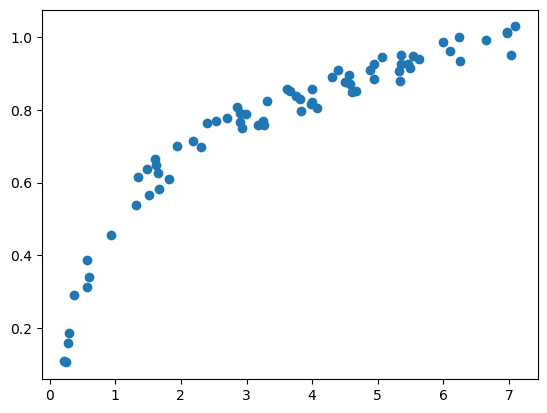

epoch: 0, loss is: 0.1189664974808693
epoch: 500, loss is: 0.02312743291258812
epoch: 1000, loss is: 0.00767797976732254
epoch: 1500, loss is: 0.003919810056686401
epoch: 2000, loss is: 0.0029780655167996883
epoch: 2500, loss is: 0.002704547718167305
epoch: 3000, loss is: 0.002611851552501321
epoch: 3500, loss is: 0.002572310622781515
epoch: 4000, loss is: 0.0025486371014267206
epoch: 4500, loss is: 0.002529143588617444
epoch: 5000, loss is: 0.0025099837221205235
epoch: 5500, loss is: 0.0024898359552025795
epoch: 6000, loss is: 0.00246823369525373
epoch: 6500, loss is: 0.002445054706186056
epoch: 7000, loss is: 0.002420368604362011
epoch: 7500, loss is: 0.002394396113231778
epoch: 8000, loss is: 0.002367498353123665
epoch: 8500, loss is: 0.0023401733487844467
epoch: 9000, loss is: 0.0023129619657993317
epoch: 9500, loss is: 0.002286414382979274
epoch: 10000, loss is: 0.002260951092466712
epoch: 10500, loss is: 0.002236863598227501
epoch: 11000, loss is: 0.00221424363553524
epoch: 11500

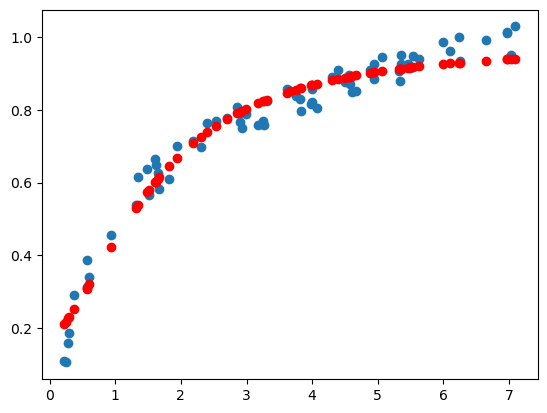

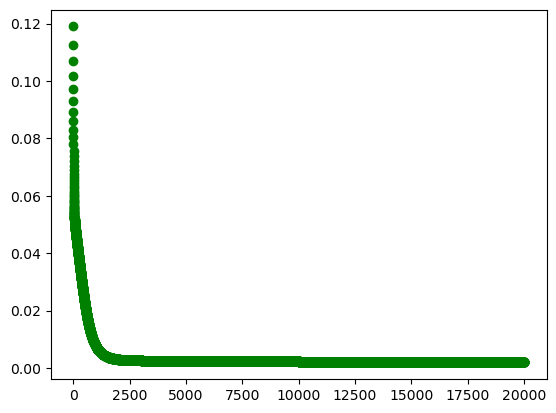

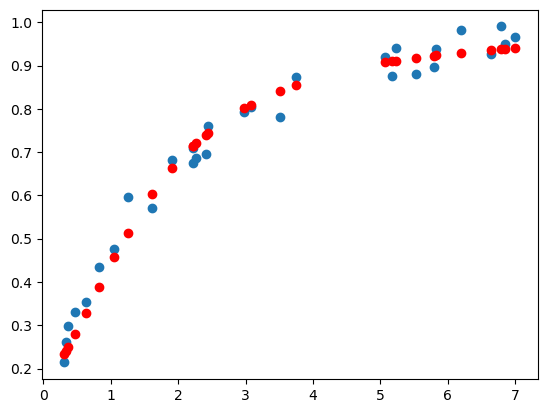

测试集上MSE损失值:0.0012293749023228884
linear_hidden.weight Parameter containing:
tensor([[ 1.3213],
        [-0.4322],
        [-0.3496],
        [-0.5231],
        [-0.5097],
        [-0.4297],
        [ 0.3578],
        [-0.5288],
        [ 1.3732],
        [-0.3002]], requires_grad=True)
linear_hidden.bias Parameter containing:
tensor([ 0.0923, -0.2524,  1.2313,  0.3842, -0.4636,  0.2633,  0.0102, -0.7561,
         0.0548, -0.8577], requires_grad=True)
linear_output.weight Parameter containing:
tensor([[ 1.2394, -0.8554, -1.3848, -1.1252, -0.8918, -1.1529,  0.6065, -0.4604,
          1.3557, -0.5045]], requires_grad=True)
linear_output.bias Parameter containing:
tensor([0.0955], requires_grad=True)


In [6]:
# 生成数据
data_size = 100
in_dim = 1
x_train, y_train, x_test, y_test = create_linear_data(data_size, in_dim, if_plot=True)

# 线性回归模型实例化
MLP = MLP_Model(in_dim, lr=0.1, epoches=20000, hidden_dim=10) # 1 x 10 x 1
# 模型训练
losses = MLP.train(x_train, y_train)

# 画图
plt.figure()
plt.scatter(np.arange(len(losses)), losses, marker='o', c='green')
# plt.savefig('loss.jpg')   # 保存图片
#plt.show()
# 模型测试
prediction, testMSE = MLP.test(x_test, y_test)
print('测试集上MSE损失值:{}'.format(testMSE))

for name,parameter in MLP.model.named_parameters():
    print(name, parameter)